# Creating a more current/forward looking model

A previous workbook creates a model built on metrics whose reportign is delayed. The below levarages this model with metrics that are more current or forward looking. This would create a model with a view into the market today, as opposed to a month or two ago.

Variable Notes: <br>
0 UNEMP increases accuracy a godo bit <br>
1 Months of Supply does little <br>
2 Homes for Sale does help good bit <br>
3 Mortgage Rate actually actually hurts but just a  little - DONT INCLUDE <br>
4 Permits Numbers burts a little - DONT INCLUDE <br>
5 Permit Evalution hurts a little - DONT INCLUDE <br>
6 CONST helps a good bit<br>
7 Housing Starts hurts a little - DONT INCLUDE <br>
8 Consumption Helps a good bit<br>
9 Disposable income helps some<br>
10 Fed Rate elps a little <br>
11 Savings brings accuracy down a good bit. - DONT INCLUDE <br>
12 Homes Sold brought accuracy down and increased error - DONT INCLUDE <br>
13 GDP Index brings both down - DONT INCLUDE<br>

New variables to add: VNQ, which are updated daily

In [51]:
# load modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sb

In [52]:
# load data
date_col1 = ['Period']
date_col2 = ['Quarter Starting']
date_col3 = ['Year']
date_col4 = ['Quarter'] 
x_monthly = pd.read_csv('x_monthly_revised.csv', parse_dates=date_col1, dayfirst=True) #Monthly Data

print(x_monthly.dtypes, x_monthly.shape)

Period               datetime64[ns]
VNQ                         float64
UNEMP                       float64
Months of Supply            float64
Homes for Sale                int64
Homes for Sale NE             int64
CONST                         int64
Consumption                 float64
Disposable Income           float64
HPI                         float64
dtype: object (207, 10)


In [53]:
# run  regression model from previous work
x = x_monthly[['UNEMP','Months of Supply','Homes for Sale','CONST','Consumption',
               'Disposable Income']] # removing date column 

y = x_monthly['HPI'] #Removing date column

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, shuffle=False, stratify=None)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

print(reg.intercept_)
print('R^2 Value of Train:', reg.score(x_train, y_train))
print('R^2 Value of Test:', reg.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('HPI Stats:')
print(y_test.describe())

-39.86227337490109
R^2 Value of Train: 0.9784233974425575
R^2 Value of Test: 0.9528829747176137
Mean Absolute Error: 5.009329293202215
Mean Squared Error: 32.81260830760358
Root Mean Squared Error: 5.7282290725496985
HPI Stats:
count     73.000000
mean     210.614178
std       26.572146
min      176.549000
25%      190.583000
50%      205.791000
75%      218.254000
max      279.801000
Name: HPI, dtype: float64


To add the new variable, we reduced the historical data down significantly. This impacted accuracy, but the model is still reasonable and we can always get the coefficients from the previous notebook based on more historical data, but current model performs better in more recent time periods.

Note that if we add the new VNQ variable it decreases accuracy a little bit more. But the forecast is still accurate enough to be useful.

Text(0.5, 1.0, 'Actual vs Predicted HPI: Monthly Data')

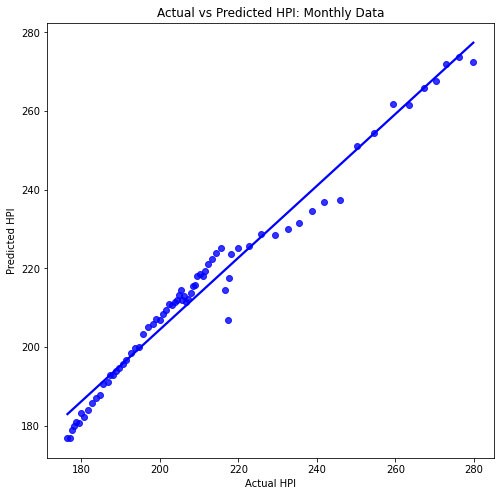

In [55]:
# lets plot predictions vs actuals to see how the spread looks
plt.figure(figsize=(8,8))
sb.regplot(x=y_test, y=y_predict, ci=None, color="Blue")
plt.xlabel("Actual HPI")
plt.ylabel('Predicted HPI')
plt.title("Actual vs Predicted HPI: Monthly Data")

More accuracy for recent periods, even though overall it is sligthly less accurate.

<function matplotlib.pyplot.show(close=None, block=None)>

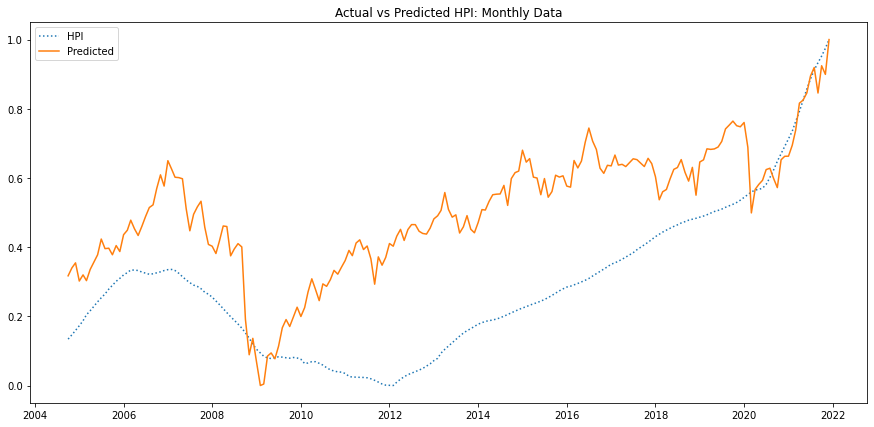

In [56]:
# predict for all periods and compare on timeline to HPI
x_whole = x
y_predict_whole = reg.predict(x_whole)
x_monthly['y_predict_whole'] = y_predict_whole

plt.figure(figsize=(15,7))
plt.plot(df_scaled['Period'], df_scaled['HPI'], label = "HPI",linestyle=":")
plt.plot(df_scaled['Period'], df_scaled['y_predict_whole'], label = "Predicted",linestyle="-")
plt.title("Actual vs Predicted HPI: Monthly Data")
plt.legend()
plt.show

And lets look at all variables, including the new one, on the timeline so we can see how close they are

In [57]:
# first scale everything
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
x2 = x_monthly[['VNQ','UNEMP','Months of Supply','Homes for Sale','CONST','Consumption',
               'Disposable Income', 'HPI', 'y_predict_whole']] # removing date column     
    
df_scaled = scaler.fit_transform(x2.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[ 'VNQ', 'UNEMP', 'Months of Supply',
                                             'Homes for Sale', 'CONST','Consumption',
                                             'Disposable Income', 'HPI', 'y_predict_whole'])
df_scaled['Period'] = x_monthly['Period']

<function matplotlib.pyplot.show(close=None, block=None)>

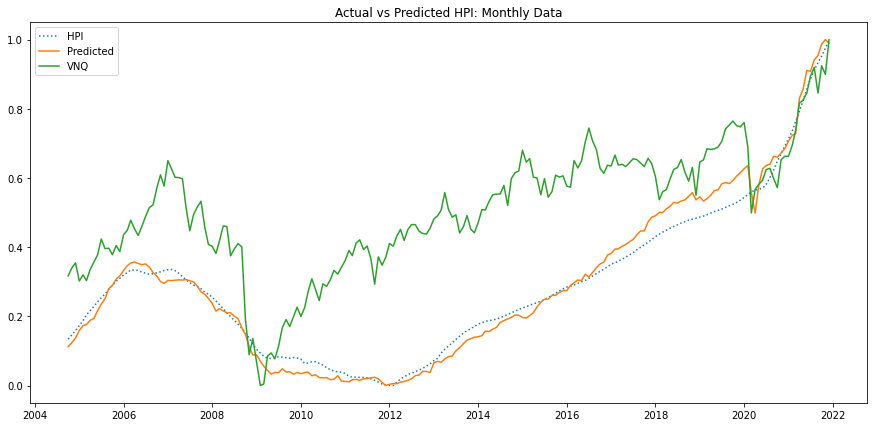

In [61]:
# first plot VVNQ
plt.figure(figsize=(15,7))
plt.plot(df_scaled['Period'], df_scaled['HPI'], label = "HPI",linestyle=":")
plt.plot(df_scaled['Period'], df_scaled['y_predict_whole'], label = "Predicted",linestyle="-")
plt.plot(df_scaled['Period'], df_scaled['VNQ'], label = "VNQ",linestyle="-")
#plt.plot(df_scaled['Period'], df_scaled['UNEMP'], label = "UNEMP",linestyle="-")
#plt.plot(df_scaled['Period'], df_scaled['Months of Supply'], label = "Months of Supply",linestyle="-")
#plt.plot(df_scaled['Period'], df_scaled['Homes for Sale'], label = "Homes for Sale",linestyle="-")
#plt.plot(df_scaled['Period'], df_scaled['CONST'], label = "CONST",linestyle="-")
#plt.plot(df_scaled['Period'], df_scaled['Consumption'], label = "Consumption",linestyle="-")
#plt.plot(df_scaled['Period'], df_scaled['Disposable Income'], label = "Disposable Income",linestyle="-")
plt.title("Actual vs Predicted HPI: Monthly Data")
plt.legend()
plt.show

We can see that we need to scale and smooth VNQ if it is going to be helpful. 

In [62]:
df_scaled['VNQ_Scaled'] = df_scaled['VNQ'] * 0.8

<function matplotlib.pyplot.show(close=None, block=None)>

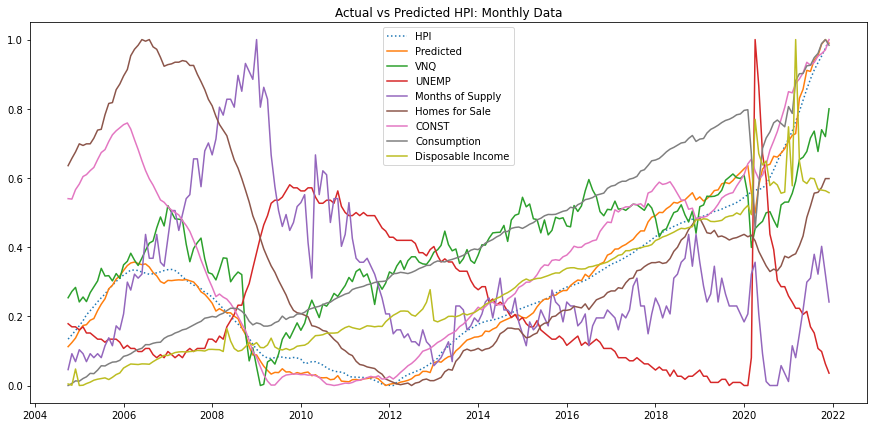

In [94]:
plt.figure(figsize=(15,7))
plt.plot(df_scaled['Period'], df_scaled['HPI'], label = "HPI",linestyle=":")
plt.plot(df_scaled['Period'], df_scaled['y_predict_whole'], label = "Predicted",linestyle="-")
plt.plot(df_scaled['Period'], df_scaled['VNQ_Scaled'], label = "VNQ",linestyle="-")
plt.plot(df_scaled['Period'], df_scaled['UNEMP'], label = "UNEMP",linestyle="-")
plt.plot(df_scaled['Period'], df_scaled['Months of Supply'], label = "Months of Supply",linestyle="-")
plt.plot(df_scaled['Period'], df_scaled['Homes for Sale'], label = "Homes for Sale",linestyle="-")
plt.plot(df_scaled['Period'], df_scaled['CONST'], label = "CONST",linestyle="-")
plt.plot(df_scaled['Period'], df_scaled['Consumption'], label = "Consumption",linestyle="-")
plt.plot(df_scaled['Period'], df_scaled['Disposable Income'], label = "Disposable Income",linestyle="-")
plt.title("Actual vs Predicted HPI: Monthly Data")
plt.legend()
plt.show

The above is spaghetti, but we can see a couple of things:
- Unemloyment  hurts consumption
- When there were not enough homes fora sale in the recent period, this drove prices up
- CONST does a good job of correlating with house prices
- VNQ does as godo a job of tracking prices as any independent varaiable
- Disposable income has helped to drive up prices but it is now goign down


In [95]:
# So how accurate is VNQ:

x = df_scaled[['VNQ']] # removing date column 
y = df_scaled['HPI'] #Removing date column

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, shuffle=False, stratify=None)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

print('R^2 Value of Train:', reg.score(x_train, y_train))
print('R^2 Value of Test:', reg.score(x_test, y_test))

R^2 Value of Train: 0.262881458022592
R^2 Value of Test: -1.669762002723858


It is not accurate at all on its own. Can we scale down the number of variables to get a decent prediction with jsut a few inputs?


In [99]:
x = df_scaled[['UNEMP','Homes for Sale','CONST','Consumption',]] # removing date column 
y = df_scaled['HPI'] #Removing date column

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, shuffle=False, stratify=None)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

print('R^2 Value of Train:', reg.score(x_train, y_train))
print('R^2 Value of Test:', reg.score(x_test, y_test))

# get importance of features
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

R^2 Value of Train: 0.9771946762466611
R^2 Value of Test: 0.9439551598907098
Feature: 0, Score: 0.21286
Feature: 1, Score: 0.35149
Feature: 2, Score: 0.30742
Feature: 3, Score: 0.71586


So the key variables are (in order of least to most important):
- 'UNEMP'
- 'CONST'
- 'Homes for Sale'
- 'Consumption'